In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import plotly.express as px
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import cv2

In [4]:
!pip install -q kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"creepsow123","key":"55dd089fbd151e2b1976c30b9400f453"}'}

In [6]:
!mkdir ~/.kaggle

In [7]:
!mv kaggle.json ~/.kaggle/

In [8]:
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download mloey1/ahcd1

Dataset URL: https://www.kaggle.com/datasets/mloey1/ahcd1
License(s): DbCL-1.0
 96% 23.0M/24.0M [00:02<00:00, 13.5MB/s]
100% 24.0M/24.0M [00:02<00:00, 9.38MB/s]


In [ ]:
!unzip /content/ahcd1.zip

In [11]:
Train_images = pd.read_csv("/content/csvTrainImages 13440x1024.csv")
Train_labels = pd.read_csv("/content/csvTrainLabel 13440x1.csv")
Test_images = pd.read_csv("/content/csvTestImages 3360x1024.csv")
Test_labels = pd.read_csv("/content/csvTestLabel 3360x1.csv")


In [12]:
print(f"train_images¨{Train_images.shape}")
print(f"Train_labels¨{Train_labels.shape}")
print(f"Test_images¨{Test_images.shape}")
print(f"Test_labels¨{Train_labels.shape}")

train_images¨(13439, 1024)
Train_labels¨(13439, 1)
Test_images¨(3359, 1024)
Test_labels¨(13439, 1)


In [13]:
Train_images

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.896,0.897,0.898,0.899,0.900,0.901,0.902,0.903,0.904,0.905
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
arabic_chars = ['alef','beh','teh','theh','jeem'
                ,'hah','khah','dal','thal','reh',
                'zain','seen','sheen','sad','dad',
                'tah','zah','ain','ghain','feh','qaf'
                ,'kaf','lam','meem','noon','heh','waw'
                ,'yeh']
print(len(arabic_chars))

28


In [15]:
x_train = Train_images.to_numpy()
y_train = Train_labels.to_numpy()-1

x_test = Test_images.to_numpy()
y_test = Test_labels.to_numpy()-1
print(f"X_Train Shape : {x_train.shape}")
print(f"X_Test  Shape : {x_test.shape}")
print(f"Y_Train Shape : {y_train.shape}")
print(f"Y_Test  Shape : {y_test.shape}")

X_Train Shape : (13439, 1024)
X_Test  Shape : (3359, 1024)
Y_Train Shape : (13439, 1)
Y_Test  Shape : (3359, 1)


In [16]:
x_train = x_train.reshape(-1,32,32,1)#(-1) for calculating all samples,1024=32x32 we need to convert it to 2D to be compatable with CNN's[original data was 1D(1024)],(1)for gray scale channel
x_test  = x_test.reshape(-1,32,32,1)

# Transpose the dataset (swap width and height)
x_train = np.transpose(x_train, (0, 2, 1, 3))  # Swaps the 1st and 2nd axes
x_test  = np.transpose(x_test, (0, 2, 1, 3))

print(x_train.shape)
print(x_test.shape)

x_train = x_train / 255.0
x_test  = x_test / 255.0

(13439, 32, 32, 1)
(3359, 32, 32, 1)


In [17]:
#now the shape is ((height, width, channels)) which is the shape that CNN's expect

In [18]:
x_train[:5]

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

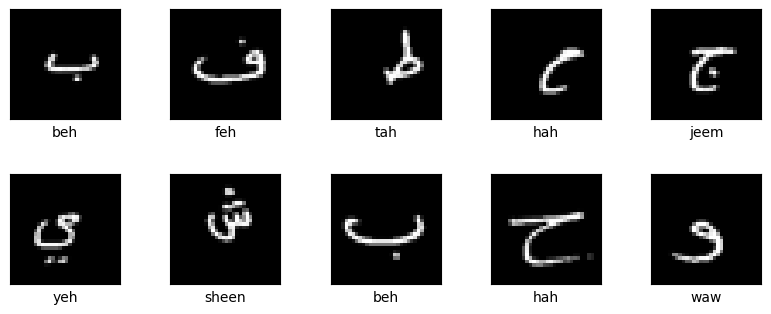

In [19]:
ra = np.random.randint(0, 13440, size=25)

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(32, 32), "gray")
    plt.xlabel(arabic_chars[int(y_train[ra[i]][0])], fontsize=10, color='black', ha='center')
    plt.subplots_adjust(hspace=0.5)
plt.show()

In [20]:


y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)
print(y_train.shape, y_test.shape)

(13439, 28) (3359, 28)


In [21]:
model = Sequential()

model.add(Conv2D(32, (5, 5), padding="same", activation="relu", input_shape=(32, 32, 1)))
model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), padding="same", activation="relu"))
model.add(Conv2D(64, (5, 5), activation="relu"))
model.add(Conv2D(64, (5, 5), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(28, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 12, 12, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 2, 2, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 28)                  │           3,612 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361,692 (1.38 MB)

 Trainable params: 361,500 (1.38 MB)

 Non-trainable params: 192 (768.00 B)

In [22]:
datagen = ImageDataGenerator(
    """featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False"""
)
train_gen = datagen.flow(x_train, y_train, batch_size=64)
test_gen  = datagen.flow(x_test , y_test , batch_size=64)


In [23]:
model_checkpoint_callback = ModelCheckpoint(
    filepath="best.hdf5.keras",
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

history = model.fit(
    train_gen,
    epochs=30,
    verbose=1,
    steps_per_epoch=x_train.shape[0] // 64,
    validation_data=test_gen,
    validation_steps=x_test.shape[0] // 64,
    callbacks=[model_checkpoint_callback]
)
print("Train Success!!")

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


207/209 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2586 - loss: 2.5183
Epoch 1: val_accuracy improved from -inf to 0.05469, saving model to best.hdf5.keras
209/209 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.2613 - loss: 2.5079 - val_accuracy: 0.0547 - val_loss: 6.8813
Epoch 2/30
  1/209 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7500 - loss: 0.8591

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.05469 to 0.06701, saving model to best.hdf5.keras
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7500 - loss: 0.8591 - val_accuracy: 0.0670 - val_loss: 6.9284
Epoch 3/30
206/209 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7699 - loss: 0.7050
Epoch 3: val_accuracy improved from 0.06701 to 0.32272, saving model to best.hdf5.keras
209/209 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.7705 - loss: 0.7031 - val_accuracy: 0.3227 - val_loss: 3.1464
Epoch 4/30
  1/209 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9219 - loss: 0.2975
Epoch 4: val_accuracy improved from 0.32272 to 0.32632, saving model to best.hdf5.keras
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9219 - loss: 0.2975 - val_accuracy: 0.3263 - val_loss: 3.1169
Epoch 5/30
208/209 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8848 - loss: 0.3674
Epoch 5: val_accuracy improved from 0.32632 to 0.89844, saving model to best.hdf5.keras
209/209 ━━━━━━━━━━━━━━━━━━━━ 7s 10m

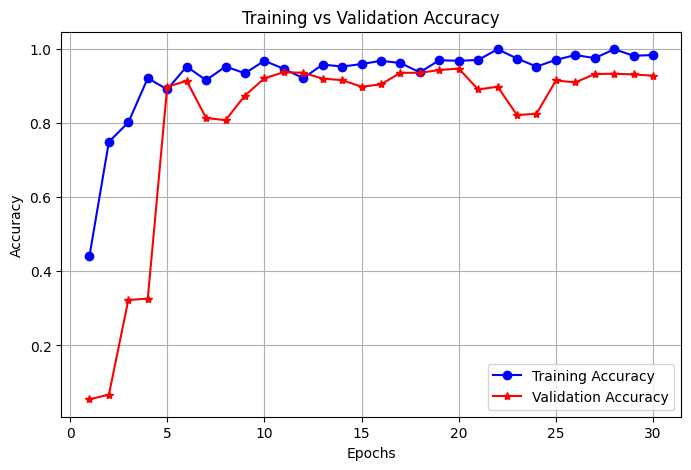

In [24]:
# Extract accuracy values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc)+1 )  # Epoch numbers

# Plo
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_acc, 'bo-', label="Training Accuracy")  # 'bo-' for blue dots & line
plt.plot(epochs, val_acc, 'r*-', label="Validation Accuracy")  # 'r*-' for red stars & line
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid()
plt.show()

105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


<Axes: >

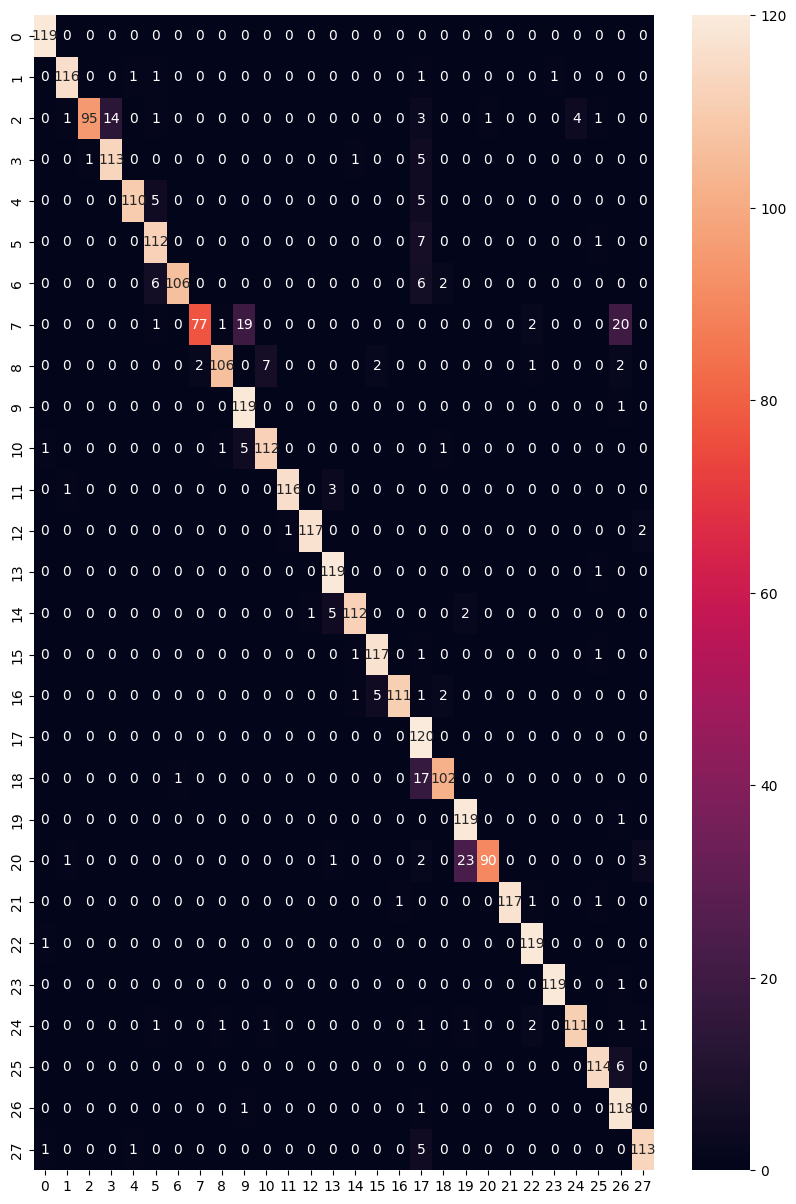

In [25]:
y_preds = model.predict(x_test)
y_pred_classes = np.argmax(y_preds, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,15))
sn.heatmap(cm, annot=True, fmt="d")

105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


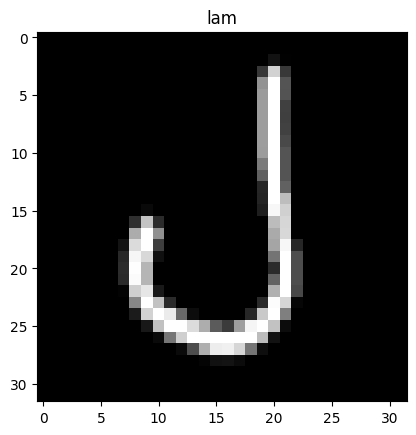

In [34]:
x_test_reshaped = x_test.reshape(-1, 32, 32, 1)

pred = model.predict(x_test_reshaped)

predicted_label = arabic_chars[np.argmax(pred[0])]
index = 99
label_index = np.argmax(y_test[index])
plt.imshow(x_test[index].reshape(32,32), cmap='gray')
plt.title(arabic_chars[label_index])
plt.show()

In [27]:
model.save('saved_model3.h5')

In [2]:
def predict_image(image_path, model_path):
    model = load_model(model_path)

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (32, 32))
    img = img.reshape(1, 32, 32, 1)
    img = img.astype('float32') / 255.0

    pred = model.predict(img)
    predicted_label = arabic_chars[np.argmax(pred)]

    return predicted_label

def plot_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

In [7]:
image_path = '/content/Test Images 3360x32x32/test/id_1016_label_4.png'
model_path = '/content/saved_model3 (1).h5'
prediction = predict_image(image_path, model_path)
print(f"predicted label : {prediction}")
plot_image(image_path)

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


Evaluating the model's performance :

In [8]:
"""
import os

test_images_csv = "/content/csvTestImages 3360x1024.csv"  # Contains the image matrices
test_labels_csv = "/content/csvTestLabel 3360x1.csv"  # Contains the image labels

# Load test image matrices (Assuming each row in the CSV corresponds to an image)
df_images = pd.read_csv(test_images_csv, header=None)  # No header row in the matrix CSV
test_images = df_images.to_numpy()  # Convert the DataFrame to a NumPy array

# Load the labels (Assuming the labels are in a separate CSV, column 'label')
df_labels = pd.read_csv(test_labels_csv)
test_labels = df_labels['1'].tolist()  # Extract labels as a list

# Reshape the images if necessary (for example, converting 1D arrays to 32x32 matrices)
# Assuming the images are 32x32 and are flattened in the CSV
test_images = test_images.reshape(-1, 32, 32, 1)  # Reshape to (num_images, 32, 32, 1)

# Normalize images to the [0, 1] range
test_images = test_images.astype('float32') / 255.0

def evaluate_model(test_images, test_labels, model_path):
    model = load_model(model_path)
    predicted_labels = model.predict(test_images)
    predicted_labels = np.argmax(predicted_labels, axis=1)  # Get predicted class indices

    # Compute evaluation metrics
    accuracy = accuracy_score(test_labels, predicted_labels)
    precision = precision_score(test_labels, predicted_labels, average='weighted')
    recall = recall_score(test_labels, predicted_labels, average='weighted')
    f1 = f1_score(test_labels, predicted_labels, average='weighted')

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\nClassification Report:")
    print(classification_report(test_labels, predicted_labels))

# Model path
model_path = "/content/saved_model.h5"

# Evaluate the model
evaluate_model(test_images, test_labels, model_path)
"""

'\nimport os\n\ntest_images_csv = "/content/csvTestImages 3360x1024.csv"  # Contains the image matrices\ntest_labels_csv = "/content/csvTestLabel 3360x1.csv"  # Contains the image labels\n\n# Load test image matrices (Assuming each row in the CSV corresponds to an image)\ndf_images = pd.read_csv(test_images_csv, header=None)  # No header row in the matrix CSV\ntest_images = df_images.to_numpy()  # Convert the DataFrame to a NumPy array\n\n# Load the labels (Assuming the labels are in a separate CSV, column \'label\')\ndf_labels = pd.read_csv(test_labels_csv)\ntest_labels = df_labels[\'1\'].tolist()  # Extract labels as a list\n\n# Reshape the images if necessary (for example, converting 1D arrays to 32x32 matrices)\n# Assuming the images are 32x32 and are flattened in the CSV\ntest_images = test_images.reshape(-1, 32, 32, 1)  # Reshape to (num_images, 32, 32, 1)\n\n# Normalize images to the [0, 1] range\ntest_images = test_images.astype(\'float32\') / 255.0\n\ndef evaluate_model(test_i

In [9]:
arabic_chars = ['alef','beh','teh','theh','jeem'
                ,'hah','khah','dal','thal','reh',
                'zain','seen','sheen','sad','dad',
                'tah','zah','ain','ghain','feh','qaf'
                ,'kaf','lam','meem','noon','heh','waw'
                ,'yeh']

In [10]:
from IPython.display import HTML, display, clear_output
from google.colab import output
import base64
import io
from PIL import Image

html_code = """
<div>
  <canvas id="canvas" width="200" height="200" style="border:1px solid; background-color: black;"></canvas>
  <button onclick="saveImage()">Save Image</button>
  <button onclick="resetCanvas()">Reset Canvas</button>
</div>

<script>
var canvas = document.getElementById("canvas");
var ctx = canvas.getContext("2d");
var drawing = false;

canvas.addEventListener("mousedown", startDrawing);
canvas.addEventListener("mousemove", draw);
canvas.addEventListener("mouseup", stopDrawing);

function startDrawing(e) {
  drawing = true;
  draw(e);
}

function draw(e) {
  if (!drawing) return;
  ctx.beginPath();
  ctx.lineWidth = 5;
  ctx.lineCap = "round";
  ctx.strokeStyle = "white";
  ctx.lineTo(e.clientX - canvas.offsetLeft, e.clientY - canvas.offsetTop);
  ctx.stroke();
}

function stopDrawing() {
  drawing = false;
  ctx.closePath();
}

function resetCanvas() {
  ctx.clearRect(0, 0, canvas.width, canvas.height);
  ctx.fillStyle = "black";
  ctx.fillRect(0, 0, canvas.width, canvas.height);
}

function saveImage() {
  var dataUrl = canvas.toDataURL();
  google.colab.kernel.invokeFunction('notebook.save_image', [dataUrl], {});
}
</script>
"""

display(HTML(html_code))
def save_image(data_url):
    image_data = data_url.split(",")[1]
    img = Image.open(io.BytesIO(base64.b64decode(image_data)))
    img.save("drawing.png")

output.register_callback('notebook.save_image', save_image)


In [1]:
from PIL import Image
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/content/saved_model3 (1).h5')

# Load and preprocess the image
image_path = 'drawing.png'
img = Image.open(image_path).convert('L')  # Convert to grayscale
img = img.resize((32, 32,))  # Resize to 32x32 pixels

# Convert the image to a numpy array and normalize it
img_array = np.array(img)
img_array = img_array.reshape(1, 32, 32, 1)  # Reshape to (1, 32, 32, 1) for model input
img_array = img_array.astype('float32') / 255.0  # Normalize to range [0, 1]

# Make a prediction
prediction = model.predict(img_array)

# Get the predicted class
predicted_char = np.argmax(prediction)
print(f'The predicted charachter is: {arabic_chars[predicted_char]}')

NameError: name 'np' is not defined